In [16]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [17]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [18]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [19]:
df['Date'] = pd.to_datetime(df['date'])

In [20]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [21]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [22]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [23]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [24]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [25]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [26]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [32]:
OTG1= df[(df['city'] == 'Ahmd') & (df['product'] == 'Oven Toaster Grill')]

In [33]:
OTG1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,Oven Toaster Grill,11-01-2017,Ahmd,203572
2017-12-01,Oven Toaster Grill,12-01-2017,Ahmd,696126
2018-01-01,Oven Toaster Grill,01-01-2018,Ahmd,565434
2018-02-01,Oven Toaster Grill,02-01-2018,Ahmd,275393
2018-03-01,Oven Toaster Grill,03-01-2018,Ahmd,356683


In [34]:
OTG1.shape

(48, 4)

In [35]:
OTG= OTG1.drop('date', axis = 1)

In [36]:
OTG.head()

,product,city,sales
Date,,,
2014-04-01,Oven Toaster Grill,Ahmd,185707
2014-05-01,Oven Toaster Grill,Ahmd,267859
2014-06-01,Oven Toaster Grill,Ahmd,203264
2014-07-01,Oven Toaster Grill,Ahmd,256707
2014-08-01,Oven Toaster Grill,Ahmd,272462


In [37]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

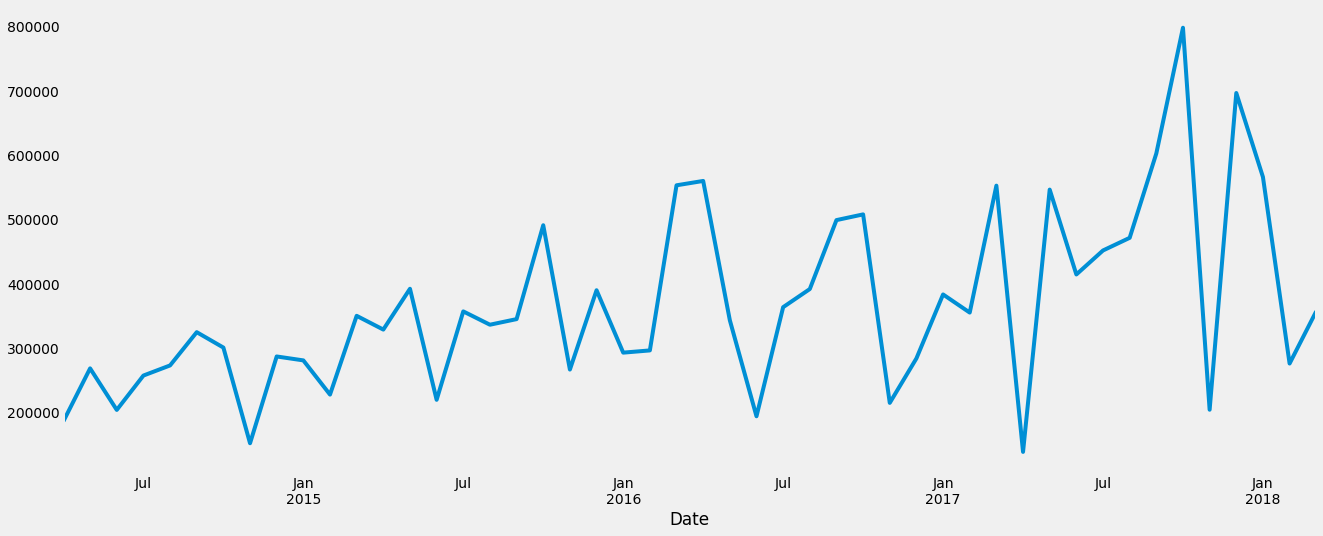

In [38]:
OTG['sales'].plot()
plt.grid();

In [39]:
OTG.sort_index(inplace= True)

In [40]:
OTG.head()

,product,city,sales
Date,,,
2014-04-01,Oven Toaster Grill,Ahmd,185707
2014-05-01,Oven Toaster Grill,Ahmd,267859
2014-06-01,Oven Toaster Grill,Ahmd,203264
2014-07-01,Oven Toaster Grill,Ahmd,256707
2014-08-01,Oven Toaster Grill,Ahmd,272462


In [41]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

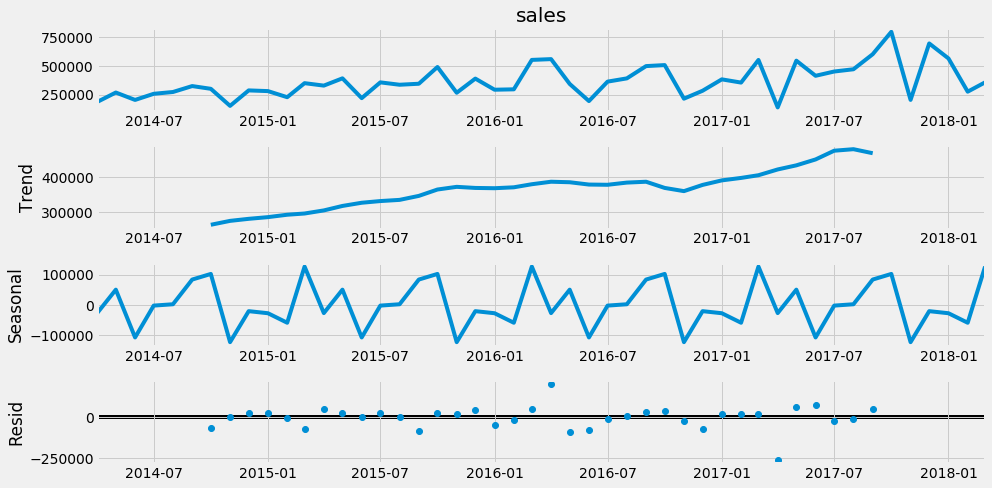

In [42]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(OTG['sales'],model='additive')
decomposition.plot();

In [43]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    264704.666667
2014-11-01    275800.708333
2014-12-01    281613.458333
2015-01-01    286424.750000
2015-02-01    293219.125000
2015-03-01    296702.958333
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -26840.046296
2014-05-01     50451.009259
2014-06-01   -107324.129630
2014-07-01     -2143.351852
2014-08-01      2272.217593
2014-09-01     83879.606481
2014-10-01    102438.842593
2014-11-01   -122878.296296
2014-12-01    -20503.712963
2015-01-01    -27359.990741
2015-02-01    -58787.449074
2015-03-01    126795.300926
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01   -66913.509259
2014-11-01    -1497.412037
2

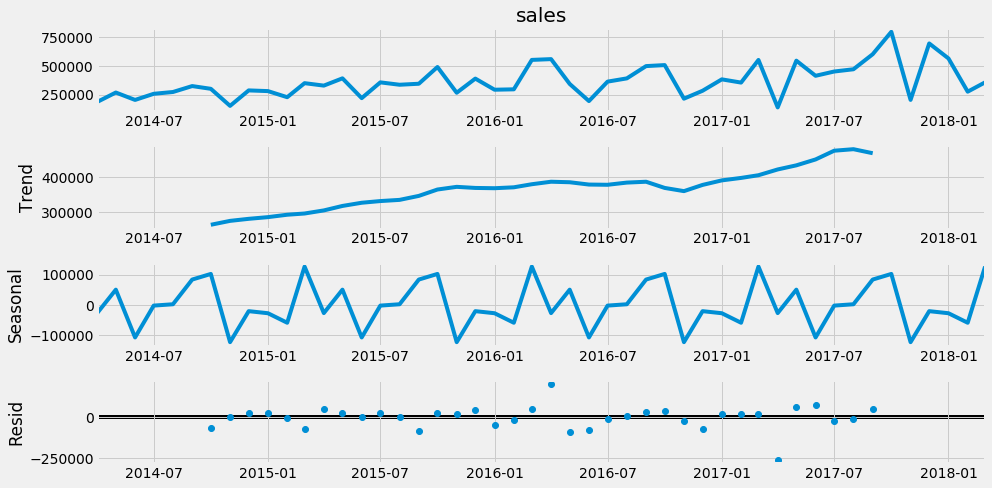

In [44]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(OTG['sales'],model='Multiplicative')
decomposition.plot();

In [45]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    264704.666667
2014-11-01    275800.708333
2014-12-01    281613.458333
2015-01-01    286424.750000
2015-02-01    293219.125000
2015-03-01    296702.958333
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    -26840.046296
2014-05-01     50451.009259
2014-06-01   -107324.129630
2014-07-01     -2143.351852
2014-08-01      2272.217593
2014-09-01     83879.606481
2014-10-01    102438.842593
2014-11-01   -122878.296296
2014-12-01    -20503.712963
2015-01-01    -27359.990741
2015-02-01    -58787.449074
2015-03-01    126795.300926
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01   -66913.509259
2014-11-01    -1497.412037
2

In [46]:
OTG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [47]:
train    =   OTG[0:int(len(OTG)*0.7)] 
test     =  OTG[int(len(OTG)*0.7):]

In [48]:
train.shape

(33, 3)

In [49]:
test.shape

(15, 3)

In [50]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,Oven Toaster Grill,Ahmd,185707
2014-05-01,Oven Toaster Grill,Ahmd,267859
2014-06-01,Oven Toaster Grill,Ahmd,203264
2014-07-01,Oven Toaster Grill,Ahmd,256707
2014-08-01,Oven Toaster Grill,Ahmd,272462


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,Oven Toaster Grill,Ahmd,391244
2016-09-01,Oven Toaster Grill,Ahmd,498433
2016-10-01,Oven Toaster Grill,Ahmd,507313
2016-11-01,Oven Toaster Grill,Ahmd,214222
2016-12-01,Oven Toaster Grill,Ahmd,283386


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,Oven Toaster Grill,Ahmd,382824
2017-02-01,Oven Toaster Grill,Ahmd,354633
2017-03-01,Oven Toaster Grill,Ahmd,552005
2017-04-01,Oven Toaster Grill,Ahmd,138004
2017-05-01,Oven Toaster Grill,Ahmd,545900


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,Oven Toaster Grill,Ahmd,203572
2017-12-01,Oven Toaster Grill,Ahmd,696126
2018-01-01,Oven Toaster Grill,Ahmd,565434
2018-02-01,Oven Toaster Grill,Ahmd,275393
2018-03-01,Oven Toaster Grill,Ahmd,356683


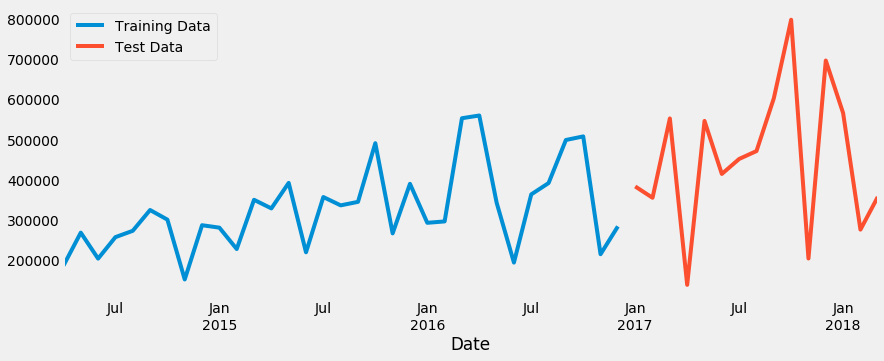

In [51]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [52]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [53]:
from sklearn import metrics

Simpleaverage

In [54]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [55]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,Oven Toaster Grill,Ahmd,382824,324862.0
2017-02-01,Oven Toaster Grill,Ahmd,354633,324862.0
2017-03-01,Oven Toaster Grill,Ahmd,552005,324862.0
2017-04-01,Oven Toaster Grill,Ahmd,138004,324862.0
2017-05-01,Oven Toaster Grill,Ahmd,545900,324862.0


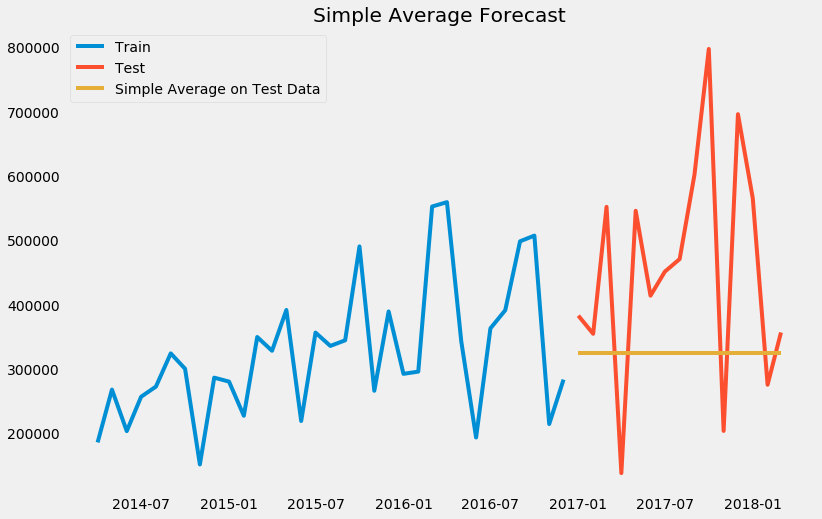

In [56]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [57]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 215870.481


In [58]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,215870.480707


In [59]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [60]:
SES_train = train.copy()
SES_test = test.copy()

In [61]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

In [62]:
model_SES_autofit = model_SES.fit(optimized=True)

In [63]:
model_SES_autofit.params

{'smoothing_level': 0.21220930232558138,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 185707.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [64]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,Oven Toaster Grill,Ahmd,382824,354723.317812
2017-02-01,Oven Toaster Grill,Ahmd,354633,354723.317812
2017-03-01,Oven Toaster Grill,Ahmd,552005,354723.317812
2017-04-01,Oven Toaster Grill,Ahmd,138004,354723.317812
2017-05-01,Oven Toaster Grill,Ahmd,545900,354723.317812


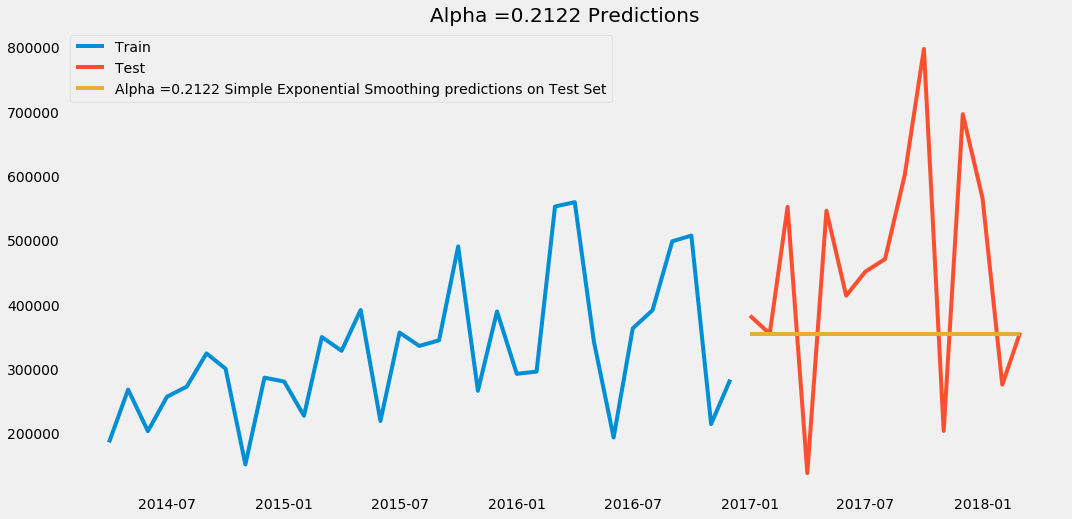

In [65]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.2122 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.2122 Predictions');

In [66]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.2122 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.2122 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 199485.475


In [67]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [68]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: 38.80216223958503


In [69]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.2122,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,215870.480707,NaN
"Alpha=0.2122,SimpleExponentialSmoothing",199485.474775,38.802162


In [70]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [71]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [72]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
1,0.2,101669.418100,198896.334700
0,0.1,107316.274844,201236.929792
2,0.3,102848.087150,205456.101420
3,0.4,105296.798348,214117.998758
4,0.5,107951.571188,223471.284652
5,0.6,110555.502144,232454.525888
6,0.7,113120.358724,239875.672645
7,0.8,115783.176313,244590.190957
8,0.9,118734.963344,245748.528058


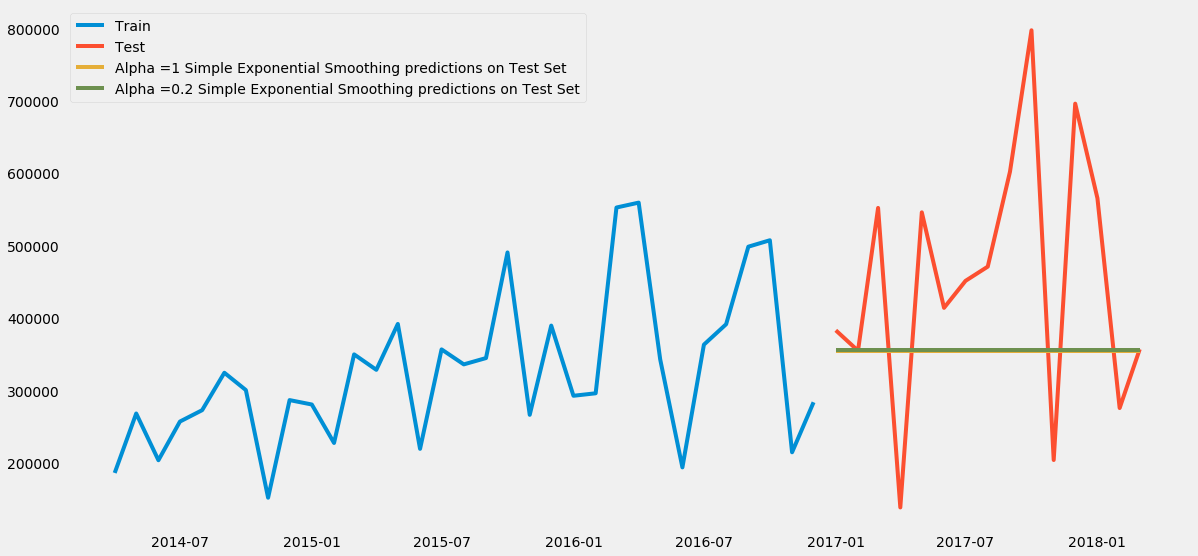

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [74]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.2
                                                                ])
print('\nMAPE:',mape)


MAPE: 38.775728642466866


In [75]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,215870.480707,NaN
"Alpha=0.2122,SimpleExponentialSmoothing",199485.474775,38.802162
"Alpha=0.2,SimpleExponentialSmoothing",198896.334700,38.775729


Double

In [76]:
DES_train = train.copy()
DES_test = test.copy()

In [77]:
model_DES = Holt(DES_train['sales'])

In [78]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [79]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [80]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,306105.857624,191851.298303
1,0.1,0.2,218288.790653,271591.389918
2,0.1,0.3,188105.456381,184715.781393
3,0.1,0.4,172619.898911,171822.636381
4,0.1,0.5,163818.048788,176325.701551
...,...,...,...,...
95,1.0,0.6,162599.141134,411966.195266
96,1.0,0.7,170284.057063,312293.407418
97,1.0,0.8,178563.530783,196642.382279
98,1.0,0.9,187618.530825,246606.611531


In [81]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
3,0.1,0.4,172619.898911,171822.636381
4,0.1,0.5,163818.048788,176325.701551
2,0.1,0.3,188105.456381,184715.781393
0,0.1,0.1,306105.857624,191851.298303
10,0.2,0.1,176462.674135,195499.646995


In [82]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.1,0.4])
print('\nMAPE:',mape)


MAPE: 42.008413087026675


In [83]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,215870.480707,NaN
"Alpha=0.2122,SimpleExponentialSmoothing",199485.474775,38.802162
"Alpha=0.2,SimpleExponentialSmoothing",198896.334700,38.775729
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",171822.636381,42.008413


In [84]:
TES_train = train.copy()
TES_test = test.copy()

In [85]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='Multiplicative',initialization_method='estimated')

In [86]:
model_TES_autofit = model_TES.fit()

In [87]:
model_TES_autofit.params

{'smoothing_level': 0.07571428571428572,
 'smoothing_trend': 0.07571428571428572,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 257820.94722222205,
 'initial_trend': 7330.825505050518,
 'initial_seasons': array([1.10440146, 1.26529004, 0.68779837, 1.10354114, 1.02899693,
        1.02125178, 1.1658536 , 0.56435676, 1.0453106 , 1.00588201,
        0.79619666, 1.21112065]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [88]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,Oven Toaster Grill,Ahmd,382824,419706.612927
2017-02-01,Oven Toaster Grill,Ahmd,354633,335679.347711
2017-03-01,Oven Toaster Grill,Ahmd,552005,515881.891519
2017-04-01,Oven Toaster Grill,Ahmd,138004,475207.317596
2017-05-01,Oven Toaster Grill,Ahmd,545900,549905.140046


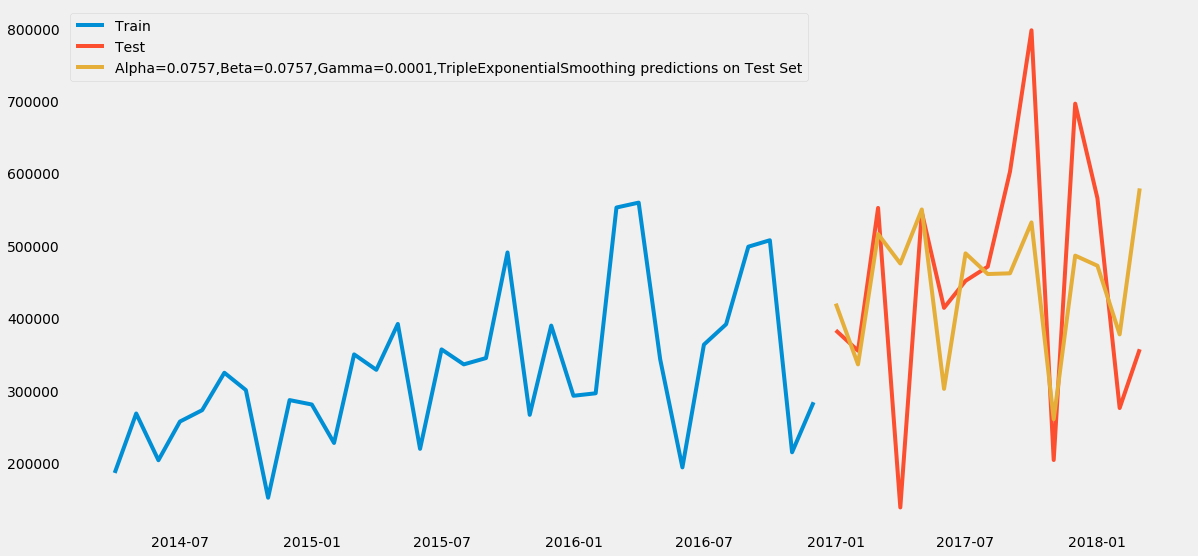

In [90]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [91]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.0757,Beta=0.0757,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.0757,Beta=0.0757,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 149854.669


In [92]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: 35.635760692384544


In [93]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,215870.480707,NaN
"Alpha=0.2122,SimpleExponentialSmoothing",199485.474775,38.802162
"Alpha=0.2,SimpleExponentialSmoothing",198896.334700,38.775729
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",171822.636381,42.008413
"Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing",149854.669157,35.635761


In [94]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [95]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [96]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,6.738185e+04,1.507745e+05
1,0.1,0.1,0.2,6.790234e+04,1.523445e+05
2,0.1,0.1,0.3,6.858903e+04,1.554896e+05
3,0.1,0.1,0.4,6.936915e+04,1.598833e+05
4,0.1,0.1,0.5,7.019385e+04,1.652258e+05
...,...,...,...,...,...
995,1.0,1.0,0.6,3.443242e+05,2.336578e+06
996,1.0,1.0,0.7,8.458459e+05,3.798640e+06
997,1.0,1.0,0.8,1.941526e+06,4.521472e+06
998,1.0,1.0,0.9,1.023879e+06,5.824862e+06


In [97]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
191,0.2,1.0,0.2,85153.708877,150408.515963
0,0.1,0.1,0.1,67381.845254,150774.487221
190,0.2,1.0,0.1,84517.933527,152033.587729
1,0.1,0.1,0.2,67902.342475,152344.534813
192,0.2,1.0,0.3,85590.321557,153640.742127


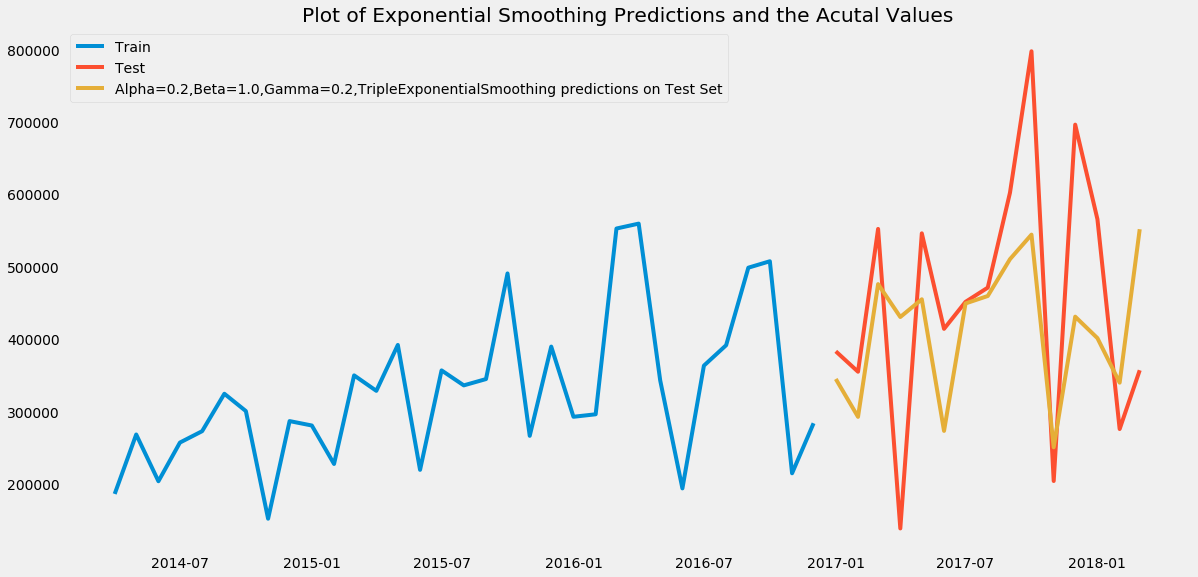

In [99]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.2000000000000000, 1.0000000000000000, 0.2], label='Alpha=0.2,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [100]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.2,1.0,0.2])
print('\nMAPE:',mape)


MAPE: 34.79614823592513


In [101]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.2,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,215870.480707,NaN
"Alpha=0.2122,SimpleExponentialSmoothing",199485.474775,38.802162
"Alpha=0.2,SimpleExponentialSmoothing",198896.334700,38.775729
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",171822.636381,42.008413
"Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing",149854.669157,35.635761
"Alpha=0.2,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing",150408.515963,34.796148


In [102]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing",149854.669157,35.635761
"Alpha=0.2,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing",150408.515963,34.796148
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",171822.636381,42.008413
"Alpha=0.2,SimpleExponentialSmoothing",198896.334700,38.775729
"Alpha=0.2122,SimpleExponentialSmoothing",199485.474775,38.802162
Simple Average,215870.480707,NaN


In [103]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

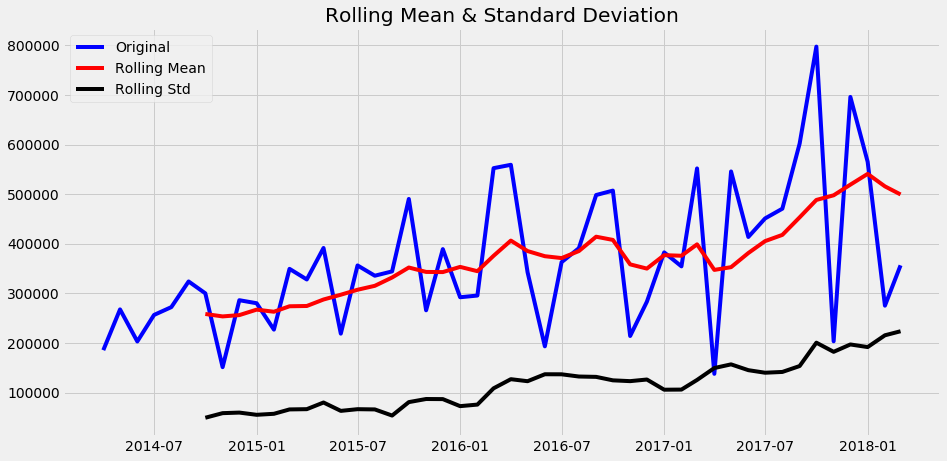

Results of Dickey-Fuller Test:
Test Statistic                -5.986045e+00
p-value                        1.791211e-07
#Lags Used                     0.000000e+00
Number of Observations Used    4.700000e+01
Critical Value (1%)           -3.577848e+00
Critical Value (5%)           -2.925338e+00
Critical Value (10%)          -2.600774e+00
dtype: float64 



In [104]:
test_stationarity(OTG['sales'])

In [105]:
#test_stationarity(OTG['sales'].diff().dropna())

In [86]:
#test_stationarity(OTG['sales'].diff(periods=2).dropna())

In [87]:
test.dropna(inplace=True)

In [244]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [125]:
from statsmodels.tsa.stattools import adfuller

In [106]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(0,1)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)


In [107]:

# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [108]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 0, 0) - AIC:942.9167114141434
ARIMA(0, 0, 1) - AIC:858.7394972288699
ARIMA(0, 0, 2) - AIC:860.7597231491723
ARIMA(0, 0, 3) - AIC:861.9057768205447
ARIMA(1, 0, 0) - AIC:858.9994053145571
ARIMA(1, 0, 1) - AIC:857.8577027052819
ARIMA(1, 0, 2) - AIC:859.421444642709
ARIMA(1, 0, 3) - AIC:857.1056092936026
ARIMA(2, 0, 0) - AIC:860.7596391863827
ARIMA(2, 0, 1) - AIC:862.7640910726441
ARIMA(2, 0, 2) - AIC:860.4257499773069
ARIMA(2, 0, 3) - AIC:858.3574225999915
ARIMA(3, 0, 0) - AIC:862.7616121648334
ARIMA(3, 0, 1) - AIC:861.5015337939201
ARIMA(3, 0, 2) - AIC:861.9728015384532
ARIMA(3, 0, 3) - AIC:862.235722590287


In [109]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
7,"(1, 0, 3)",857.105609
5,"(1, 0, 1)",857.857703
11,"(2, 0, 3)",858.357423
1,"(0, 0, 1)",858.739497
4,"(1, 0, 0)",858.999405


In [110]:
auto_ARIMA = ARIMA(train['sales'], order=(1,0,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -422.553
Date:                Sat, 21 Aug 2021   AIC                            857.106
Time:                        18:24:58   BIC                            866.085
Sample:                    04-01-2014   HQIC                           860.127
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.249e+05   6.46e+04      5.028      0.000    1.98e+05    4.51e+05
ar.L1          0.9043      0.165      5.464      0.000       0.580       1.229
ma.L1         -0.8208      0.429     -1.911      0.0

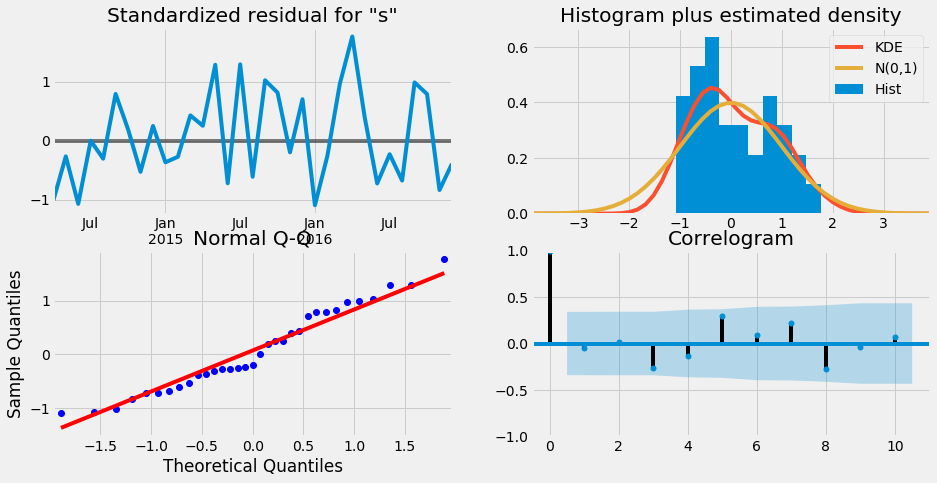

In [111]:
results_auto_ARIMA.plot_diagnostics();

In [112]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [113]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [114]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 208277.0385880094 
MAPE: 40.44198303388218


In [115]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(1,0,3)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,215870.480707,NaN
"Alpha=0.2122,SimpleExponentialSmoothing",199485.474775,38.802162
"Alpha=0.2,SimpleExponentialSmoothing",198896.334700,38.775729
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",171822.636381,42.008413
"Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing",149854.669157,35.635761
"Alpha=0.2,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing",150408.515963,34.796148
"ARIMA(1,0,3)",34.796148,40.441983


In [116]:
import itertools
p = q = range(0, 4)
d= range(0,1)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 0, 3)(0, 0, 3, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 0, 3)(1, 0, 3, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 0, 3)(2, 0, 3, 12)
Model: (3, 0, 0)(3, 0, 0, 12)
Model: (3, 0, 1)(3, 0, 1, 12)
Model: (3, 0, 2)(3, 0, 2, 12)
Model: (3, 0, 3)(3, 0, 3, 12)


In [117]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [118]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:908.8212989300139
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:581.0335348347065
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:207.97569800400436
SARIMA(0, 0, 0)x(0, 0, 3, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:543.7526379567566
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:516.4515805767423
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:209.97564362812395
SARIMA(0, 0, 0)x(1, 0, 3, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:238.93976421953113
SARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:235.01747325979113
SARIMA(0, 0, 0)x(2, 0, 2, 12)12 - AIC:211.97529994019337
SARIMA(0, 0, 0)x(2, 0, 3, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 0, 12)12 - AIC:8.0
SARIMA(0, 0, 0)x(3, 0, 1, 12)12 - AIC:10.0
SARIMA(0, 0, 0)x(3, 0, 2, 12)12 - AIC:12.0
SARIMA(0, 0, 0)x(3, 0, 3, 12)12 - AIC:14.0
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:863.466370203041
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:527.9753265296646
SARIMA(0, 0, 1)x(0, 0, 2, 12)12 - AIC:199.4784455856669
SARIMA(0, 0, 1)x(0, 0, 3,

SARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:495.6559742428622
SARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:472.26227118627463
SARIMA(2, 0, 2)x(1, 0, 2, 12)12 - AIC:165.7524989242772
SARIMA(2, 0, 2)x(1, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:188.46000793380549
SARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:190.05205861884377
SARIMA(2, 0, 2)x(2, 0, 2, 12)12 - AIC:167.00990728524766
SARIMA(2, 0, 2)x(2, 0, 3, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 0, 12)12 - AIC:16.0
SARIMA(2, 0, 2)x(3, 0, 1, 12)12 - AIC:18.0
SARIMA(2, 0, 2)x(3, 0, 2, 12)12 - AIC:20.0
SARIMA(2, 0, 2)x(3, 0, 3, 12)12 - AIC:22.0
SARIMA(2, 0, 3)x(0, 0, 0, 12)12 - AIC:751.0170863286834
SARIMA(2, 0, 3)x(0, 0, 1, 12)12 - AIC:444.49853680004907
SARIMA(2, 0, 3)x(0, 0, 2, 12)12 - AIC:141.34255149161174
SARIMA(2, 0, 3)x(0, 0, 3, 12)12 - AIC:18.0
SARIMA(2, 0, 3)x(1, 0, 0, 12)12 - AIC:495.70692885328583
SARIMA(2, 0, 3)x(1, 0, 1, 12)12 - AIC:447.4124934811194
SARIMA(2, 0, 3)x(1, 0, 2, 12)12 - AIC:143.78974116250185
SARIMA(2, 0, 3)x(1,

In [119]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
3,"(0, 0, 0)","(0, 0, 3, 12)",8.0
12,"(0, 0, 0)","(3, 0, 0, 12)",8.0
67,"(1, 0, 0)","(0, 0, 3, 12)",10.0
28,"(0, 0, 1)","(3, 0, 0, 12)",10.0
7,"(0, 0, 0)","(1, 0, 3, 12)",10.0


In [120]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,0,0),
                                seasonal_order=(0,0,3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            sales   No. Observations:                   33
Model:             SARIMAX(0, 0, [1, 2, 3], 12)   Log Likelihood                   0.000
Date:                          Sat, 21 Aug 2021   AIC                              8.000
Time:                                  18:26:44   BIC                                nan
Sample:                              04-01-2014   HQIC                               nan
                                   - 12-01-2016                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0           0
ma.S.L24            0         -0        nan        

In [121]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [122]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,0.0,98736.75544,-193520.484612,193520.484612
2017-02-01,0.0,98736.75544,-193520.484612,193520.484612
2017-03-01,0.0,98736.75544,-193520.484612,193520.484612
2017-04-01,0.0,98736.75544,-193520.484612,193520.484612
2017-05-01,0.0,98731.69134,-193510.559158,193510.559158


In [123]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 235874584760.4 
MAPE: 100.0


In [124]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,0,0)(0,0,3)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.158705e+05,NaN
"Alpha=0.2122,SimpleExponentialSmoothing",1.994855e+05,38.802162
"Alpha=0.2,SimpleExponentialSmoothing",1.988963e+05,38.775729
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.718226e+05,42.008413
"Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing",1.498547e+05,35.635761
"Alpha=0.2,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing",1.504085e+05,34.796148
"ARIMA(1,0,3)",3.479615e+01,40.441983
"SARIMA(0,0,0)(0,0,3)12",2.358746e+11,100.000000


In [125]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(1,0,3)",3.479615e+01,40.441983
"Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing",1.498547e+05,35.635761
"Alpha=0.2,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing",1.504085e+05,34.796148
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.718226e+05,42.008413
"Alpha=0.2,SimpleExponentialSmoothing",1.988963e+05,38.775729
"Alpha=0.2122,SimpleExponentialSmoothing",1.994855e+05,38.802162
Simple Average,2.158705e+05,NaN
"SARIMA(0,0,0)(0,0,3)12",2.358746e+11,100.000000


In [126]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [127]:
OTG.head()

,product,city,sales
Date,,,
2014-04-01,Oven Toaster Grill,Ahmd,185707
2014-05-01,Oven Toaster Grill,Ahmd,267859
2014-06-01,Oven Toaster Grill,Ahmd,203264
2014-07-01,Oven Toaster Grill,Ahmd,256707
2014-08-01,Oven Toaster Grill,Ahmd,272462


In [128]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(OTG1['date'])
df_prophet['y'] =OTG1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,203572
2017-12-01,2017-12-01,696126
2018-01-01,2018-01-01,565434
2018-02-01,2018-02-01,275393
2018-03-01,2018-03-01,356683


In [129]:
df_prophet.shape

(48, 2)

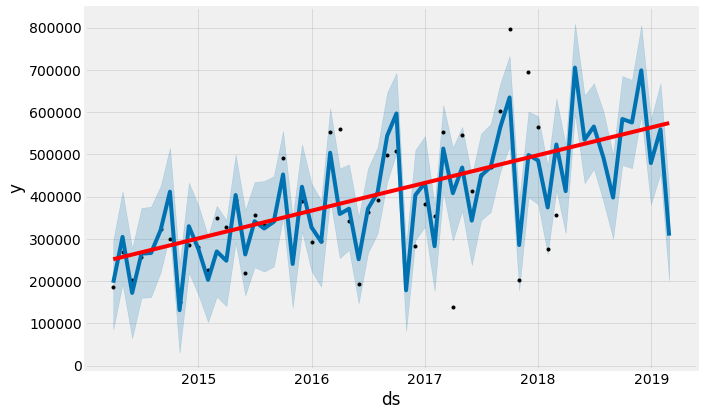

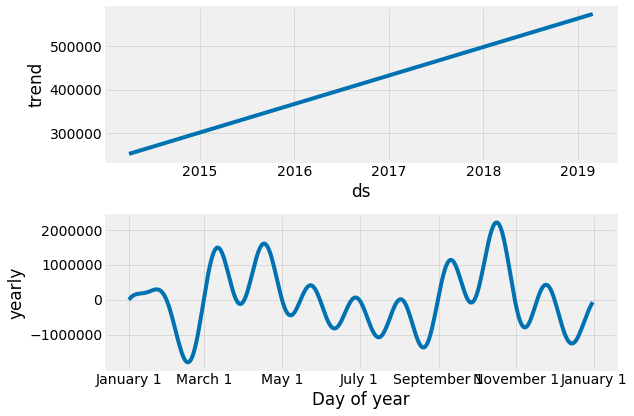

In [130]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [131]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,251759.233807,85653.881211,297105.812874,251759.233807,251759.233807,-55578.398474,-55578.398474,-55578.398474,-55578.398474,-55578.398474,-55578.398474,0.0,0.0,0.0,196180.835333
1,2014-05-01,257151.061313,193253.631280,412711.865879,257151.061313,257151.061313,47459.038565,47459.038565,47459.038565,47459.038565,47459.038565,47459.038565,0.0,0.0,0.0,304610.099878
2,2014-06-01,262722.616400,64635.487828,277181.066966,262722.616400,262722.616400,-90778.984577,-90778.984577,-90778.984577,-90778.984577,-90778.984577,-90778.984577,0.0,0.0,0.0,171943.631823
3,2014-07-01,268114.443903,160152.727145,373006.501752,268114.443903,268114.443903,-3172.843483,-3172.843483,-3172.843483,-3172.843483,-3172.843483,-3172.843483,0.0,0.0,0.0,264941.600421
4,2014-08-01,273685.998988,162329.320187,376297.457932,273685.998988,273685.998988,-7161.299545,-7161.299545,-7161.299545,-7161.299545,-7161.299545,-7161.299545,0.0,0.0,0.0,266524.699442
5,2014-09-01,279257.554075,221520.034727,425402.436841,279257.554075,279257.554075,41757.291664,41757.291664,41757.291664,41757.291664,41757.291664,41757.291664,0.0,0.0,0.0,321014.845739
6,2014-10-01,284649.381580,310945.019031,515687.941790,284649.381580,284649.381580,126999.847441,126999.847441,126999.847441,126999.847441,126999.847441,126999.847441,0.0,0.0,0.0,411649.229021
7,2014-11-01,290220.936667,30143.856156,239750.509111,290220.936667,290220.936667,-159105.206469,-159105.206469,-159105.206469,-159105.206469,-159105.206469,-159105.206469,0.0,0.0,0.0,131115.730198
8,2014-12-01,295612.764166,220095.158881,433017.413021,295612.764166,295612.764166,34335.269340,34335.269340,34335.269340,34335.269340,34335.269340,34335.269340,0.0,0.0,0.0,329948.033506
9,2015-01-01,301184.319248,167025.859862,379024.757018,301184.319248,301184.319248,-25729.378704,-25729.378704,-25729.378704,-25729.378704,-25729.378704,-25729.378704,0.0,0.0,0.0,275454.940544


In [132]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

30480835480.94599


In [133]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,2.158705e+05,NaN
"Alpha=0.2122,SimpleExponentialSmoothing",1.994855e+05,38.802162
"Alpha=0.2,SimpleExponentialSmoothing",1.988963e+05,38.775729
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.718226e+05,42.008413
"Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing",1.498547e+05,35.635761
"Alpha=0.2,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing",1.504085e+05,34.796148
"ARIMA(1,0,3)",3.479615e+01,40.441983
"SARIMA(0,0,0)(0,0,3)12",2.358746e+11,100.000000
Prophet,3.048084e+10,NaN


In [134]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"ARIMA(1,0,3)",3.479615e+01,40.441983
"Alpha=0.0757,Beta=0.0757,Gamma=0.0001,TripleExponentialSmoothing",1.498547e+05,35.635761
"Alpha=0.2,Beta=1.0,Gamma=0.2,TripleExponentialSmoothing",1.504085e+05,34.796148
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",1.718226e+05,42.008413
"Alpha=0.2,SimpleExponentialSmoothing",1.988963e+05,38.775729
"Alpha=0.2122,SimpleExponentialSmoothing",1.994855e+05,38.802162
Simple Average,2.158705e+05,NaN
Prophet,3.048084e+10,NaN
"SARIMA(0,0,0)(0,0,3)12",2.358746e+11,100.000000


In [135]:
import fbprophet

In [136]:
m = fbprophet.Prophet()

In [137]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [138]:
future = m.make_future_dataframe(periods=365)

In [139]:
forecast = m.predict(future)

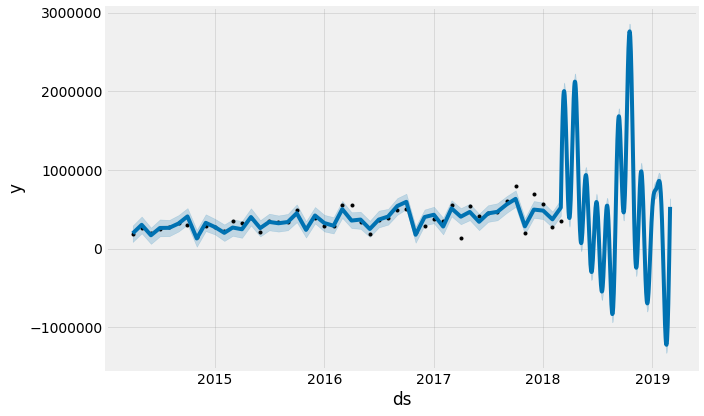

In [140]:
m.plot(forecast);

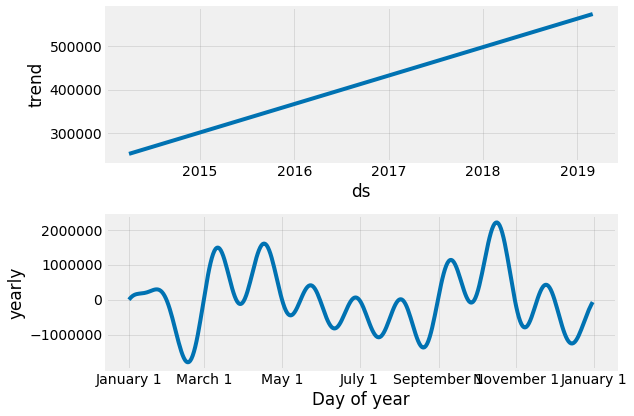

In [141]:
m.plot_components(forecast);

In [142]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,185707
2014-05-01,2014-05-01,267859
2014-06-01,2014-06-01,203264
2014-07-01,2014-07-01,256707
2014-08-01,2014-08-01,272462


In [143]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [144]:
predict=m.predict(future)

In [145]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,251759.233807,88024.143301,300420.757178,251759.233807,251759.233807,-55578.398474,-55578.398474,-55578.398474,-55578.398474,-55578.398474,-55578.398474,0.0,0.0,0.0,196180.835333
1,2014-05-01,257151.061313,201209.759194,406132.745745,257151.061313,257151.061313,47459.038565,47459.038565,47459.038565,47459.038565,47459.038565,47459.038565,0.0,0.0,0.0,304610.099878
2,2014-06-01,262722.616400,74384.501119,281266.703527,262722.616400,262722.616400,-90778.984577,-90778.984577,-90778.984577,-90778.984577,-90778.984577,-90778.984577,0.0,0.0,0.0,171943.631823
3,2014-07-01,268114.443903,155980.362177,368511.313215,268114.443903,268114.443903,-3172.843483,-3172.843483,-3172.843483,-3172.843483,-3172.843483,-3172.843483,0.0,0.0,0.0,264941.600421
4,2014-08-01,273685.998988,154248.125721,365258.278533,273685.998988,273685.998988,-7161.299545,-7161.299545,-7161.299545,-7161.299545,-7161.299545,-7161.299545,0.0,0.0,0.0,266524.699442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,573651.335887,-437702.145445,-236600.300275,573651.331041,573651.340831,-909088.983206,-909088.983206,-909088.983206,-909088.983206,-909088.983206,-909088.983206,0.0,0.0,0.0,-335437.647318
409,2019-02-26,573831.063471,-232748.767378,-28028.402843,573831.058604,573831.068432,-704536.709939,-704536.709939,-704536.709939,-704536.709939,-704536.709939,-704536.709939,0.0,0.0,0.0,-130705.646468
410,2019-02-27,574010.791054,-25126.171690,188184.240642,574010.786150,574010.796032,-488995.947275,-488995.947275,-488995.947275,-488995.947275,-488995.947275,-488995.947275,0.0,0.0,0.0,85014.843779
411,2019-02-28,574190.518638,205841.364873,412179.393193,574190.513714,574190.523632,-266557.306794,-266557.306794,-266557.306794,-266557.306794,-266557.306794,-266557.306794,0.0,0.0,0.0,307633.211844


In [146]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,196180.835333,88024.143301,300420.757178
1,2014-05-01,304610.099878,201209.759194,406132.745745
2,2014-06-01,171943.631823,74384.501119,281266.703527
3,2014-07-01,264941.600421,155980.362177,368511.313215
4,2014-08-01,266524.699442,154248.125721,365258.278533


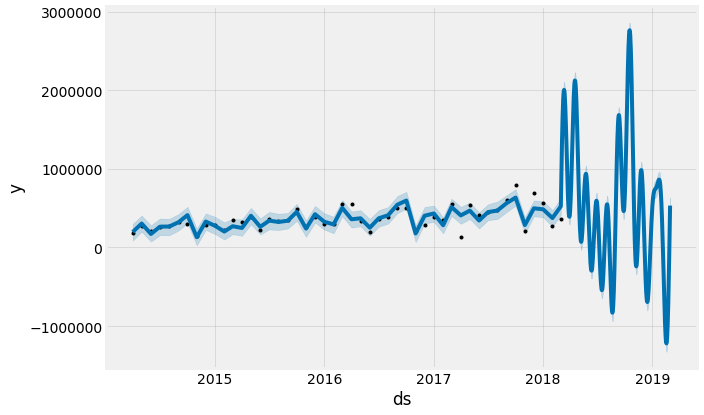

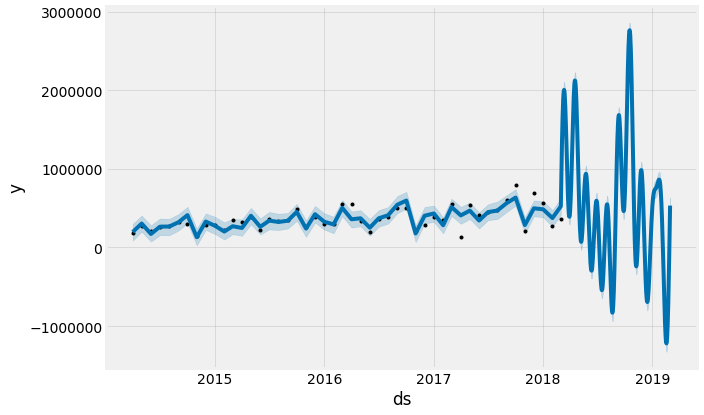

In [147]:
m.plot(predict)

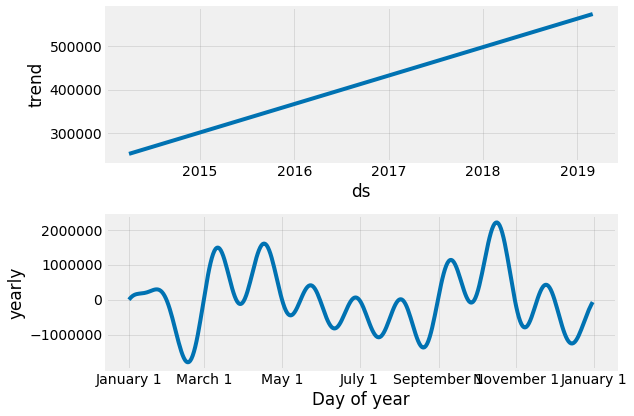

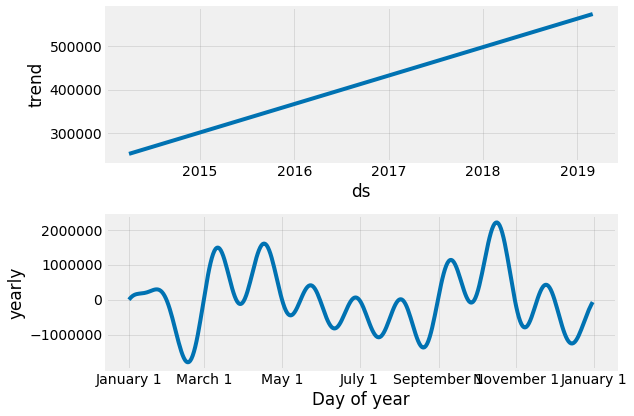

In [148]:
m.plot_components(predict)

In [149]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [150]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,451063.774152,410036.141198,487537.876817,507313,2016-09-02
1,2016-11-01,342426.589765,304565.322655,382738.311154,214222,2016-09-02
2,2016-12-01,381081.238364,345789.589577,418728.079038,283386,2016-09-02
3,2017-01-01,451967.810042,414058.569955,488702.461515,382824,2016-09-02
4,2017-02-01,208551.850276,169199.779107,247584.209583,354633,2016-09-02


In [151]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,7.419507e+10,272387.727827,218667.372648,1.436143,1.436143,0.0
1,60 days,8.083129e+10,284308.450428,254645.054606,1.679938,1.679938,0.0
2,61 days,1.486818e+10,121935.167141,121765.006262,0.404862,0.404862,0.0
3,90 days,1.142216e+10,106874.488850,106510.330562,0.278000,0.278000,0.0
4,92 days,1.029399e+10,101459.306482,101391.938915,0.299323,0.299323,0.0


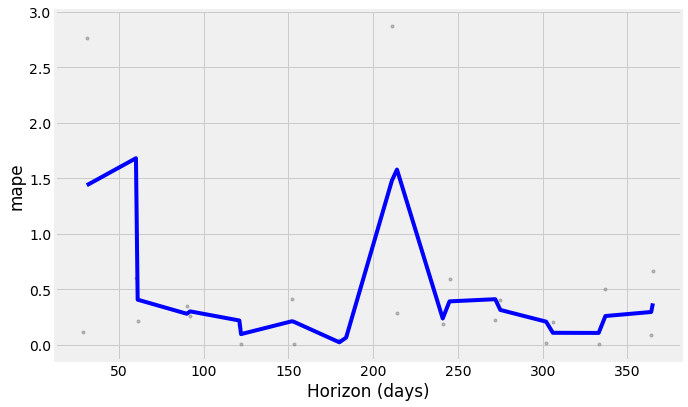

In [152]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [154]:
import statsmodels.api as sm 
arma_mod30 = sm.tsa.ARIMA(OTG['sales'], (1,0,3)).fit()

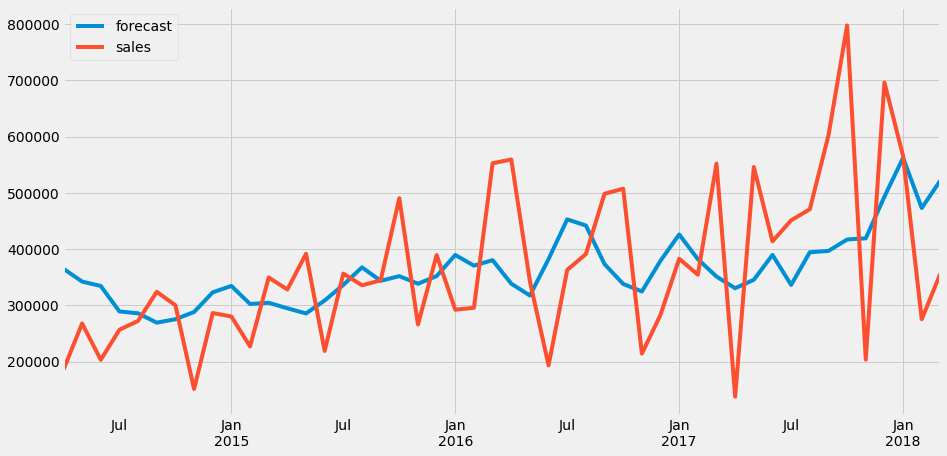

In [155]:
arma_mod30.plot_predict(dynamic=False)
plt.show()

In [156]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(OTG.sales, order=(1,0,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                  sales   No. Observations:                   48
Model:                     ARMA(1, 3)   Log Likelihood                -633.826
Method:                       css-mle   S.D. of innovations         130210.486
Date:                Sat, 21 Aug 2021   AIC                           1279.652
Time:                        18:27:51   BIC                           1290.879
Sample:                    04-01-2014   HQIC                          1283.894
                         - 03-01-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.651e+05   4.48e+04      8.154      0.000    2.77e+05    4.53e+05
ar.L1.sales     0.8243      0.166      4.973      0.000       0.499       1.149
ma.L1.sales    -0.8727      0.196     -4.444    

In [157]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = OTG.sales[:33]
test = OTG.sales[33:]

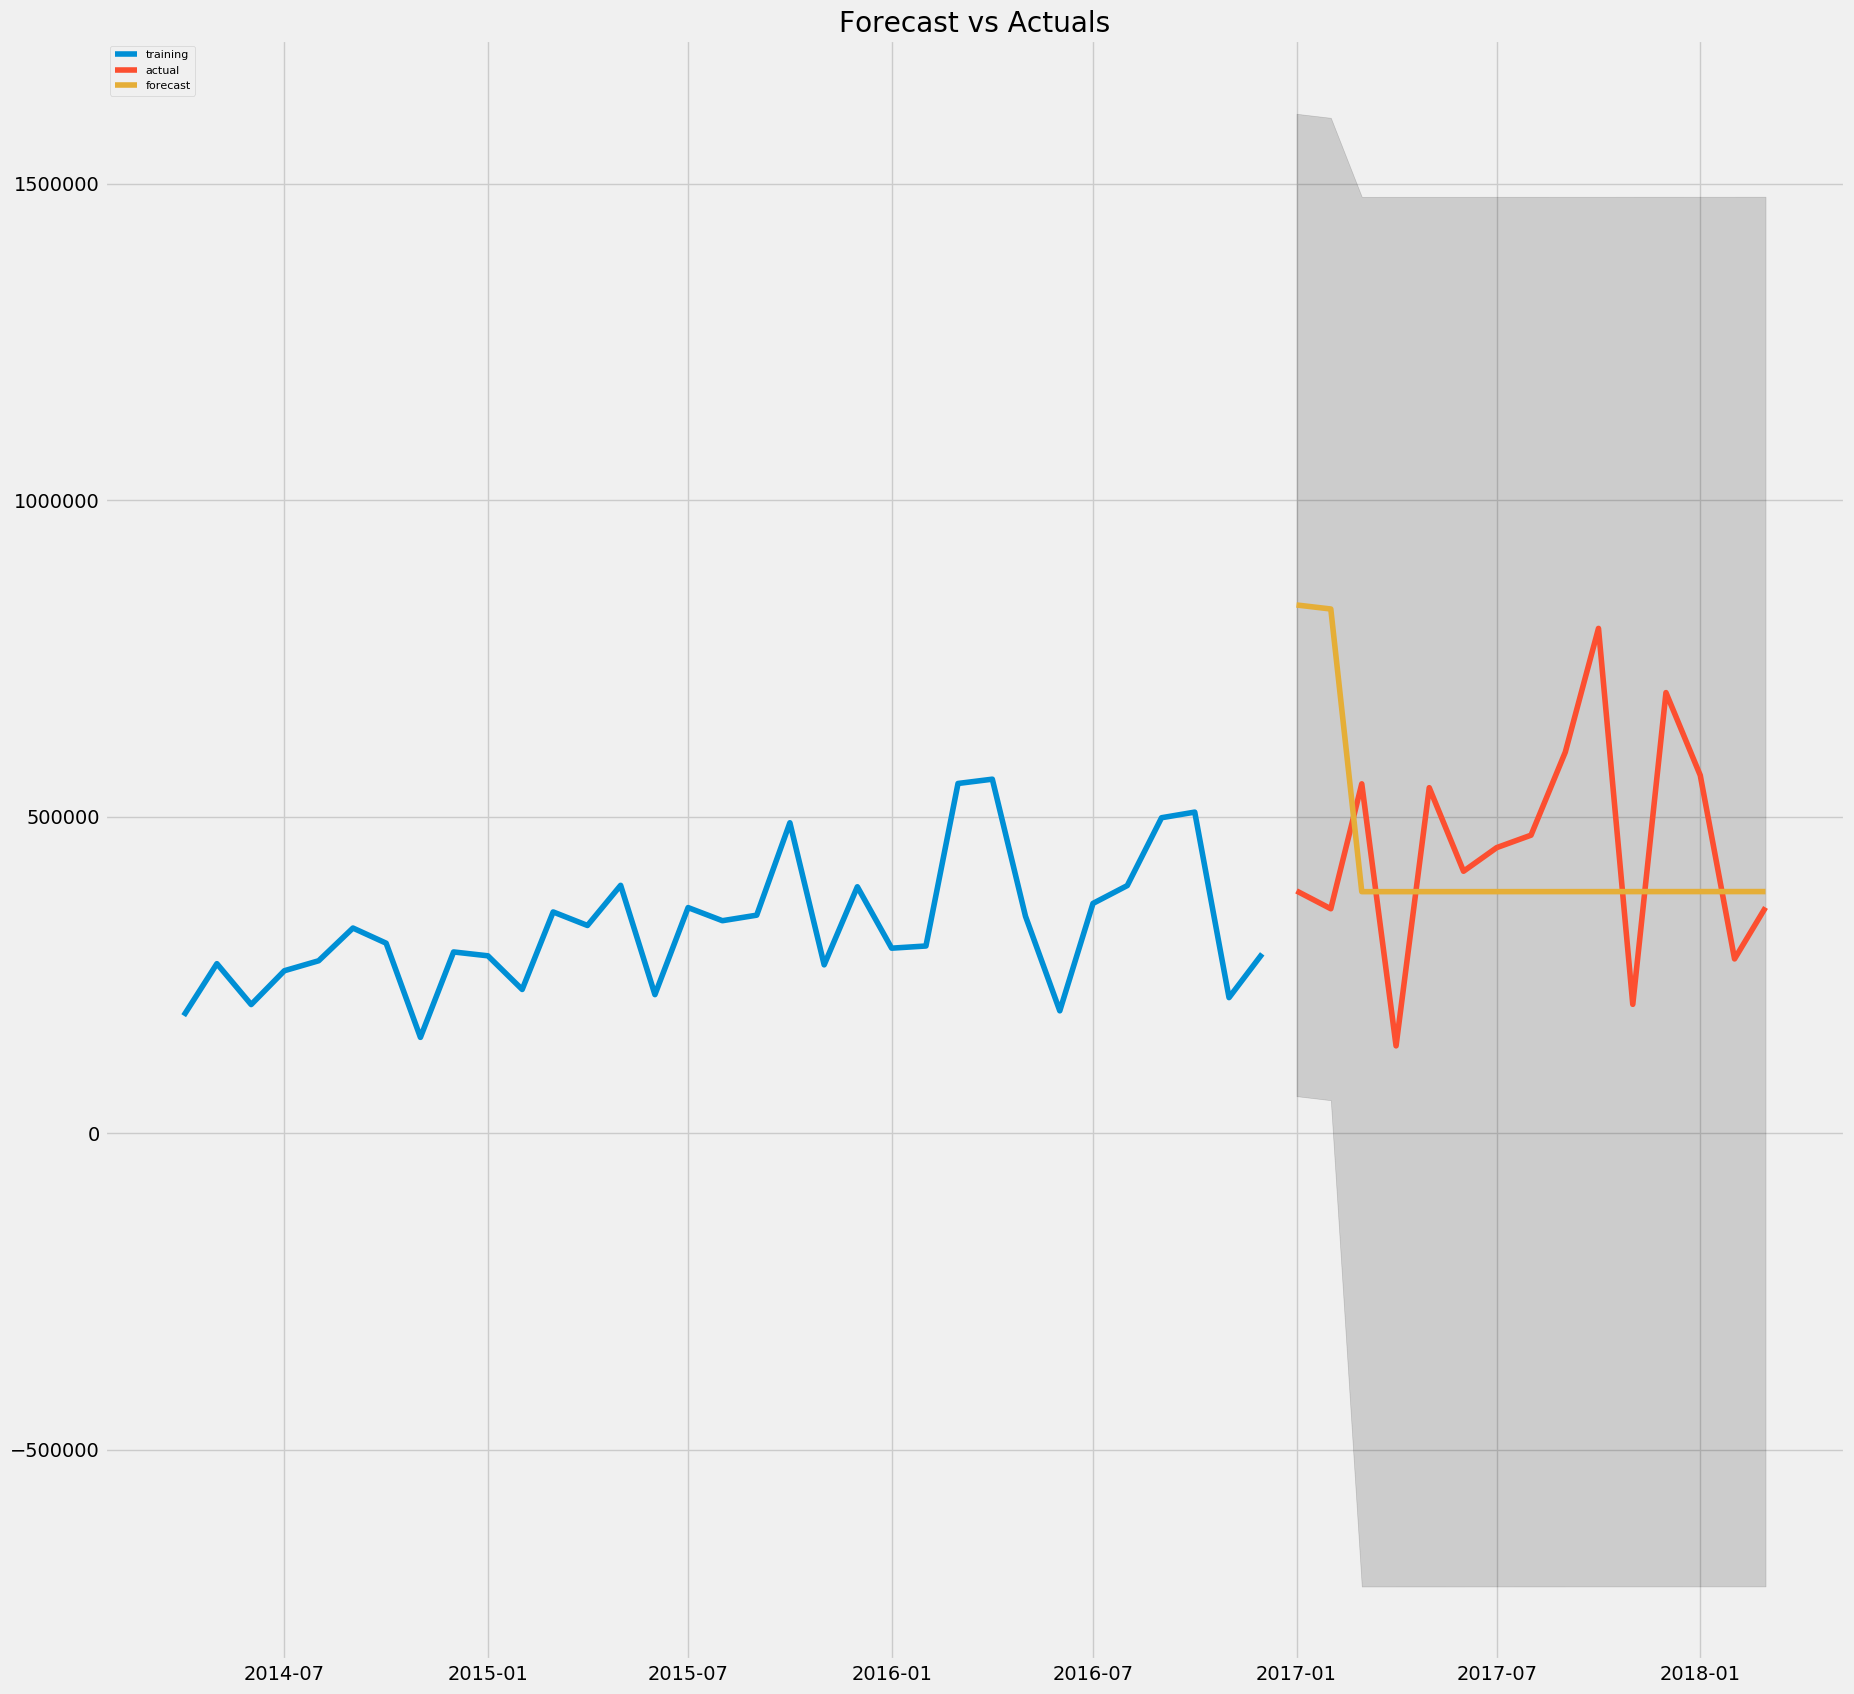

In [158]:
model = ARIMA(train, order=(1,0,3))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(20,20), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()